In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
bikes = pd.read_csv('/Users/rupaliwadhawan/Desktop/untitled folder/Data Science/bikes_sharing.csv')

In [4]:
bikes.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

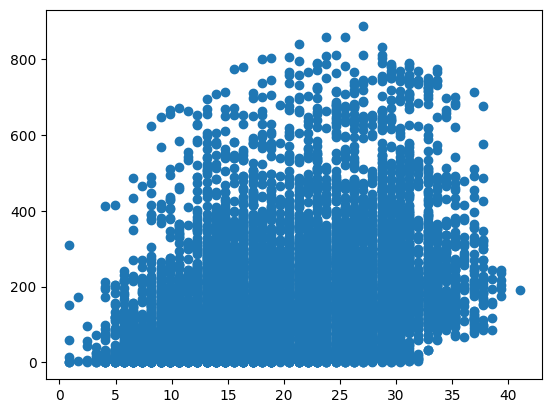

In [5]:
plt.scatter(bikes['temp'],bikes['registered'])

In [6]:
results = ols("casual ~ temp + humidity + workingday", data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2766.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:23:43   Log-Likelihood:                -54939.
No. Observations:               10886   AIC:                         1.099e+05
Df Residuals:                   10882   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.1426      1.663     31.961      0.0

In [7]:
"y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday"

'y_hat = 53.1426 + 2.9255temp - 0.8365humidity - 36.0416workingday'

In [8]:
53.1426 + (2.9255*9.84) - (0.8365*81) - (36.0416*0)

14.173019999999994

In [9]:
bikes.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
pred_vals = results.predict(bikes[['temp','humidity','workingday']])

In [11]:
pred_vals

0        14.175362
1        12.612922
2        12.612922
3        19.194189
4        19.194189
           ...    
10881    20.856745
10882    12.602536
10883     6.857740
10884     6.857740
10885     0.276474
Length: 10886, dtype: float64

In [12]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [13]:
res

y_hat  casual
0      14.175362       3
1      12.612922       8
2      12.612922       5
3      19.194189       3
4      19.194189       0
...          ...     ...
10881  20.856745       7
10882  12.602536      10
10883   6.857740       4
10884   6.857740      12
10885   0.276474       4

[10886 rows x 2 columns]

In [14]:
res['error'] = res['y_hat'] - res['casual']

In [15]:
res.head(1)

y_hat  casual      error
0  14.175362       3  11.175362

In [16]:
res['sq_error'] = res['error']**2

In [17]:
np.sqrt(res['sq_error'].mean())

37.630976661566194

In [18]:
bikes.describe()

season       holiday    workingday       weather         temp   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000  \
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  \
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

(array([   9.,   18.,   48.,   95.,  160.,  315., 2110., 5562., 2344.,
         225.]),
 array([-278.91580946, -241.14950457, -203.38319967, -165.61689478,
        -127.85058988,  -90.08428498,  -52.31798009,  -14.55167519,
          23.2146297 ,   60.9809346 ,   98.7472395 ]),
 <BarContainer object of 10 artists>)

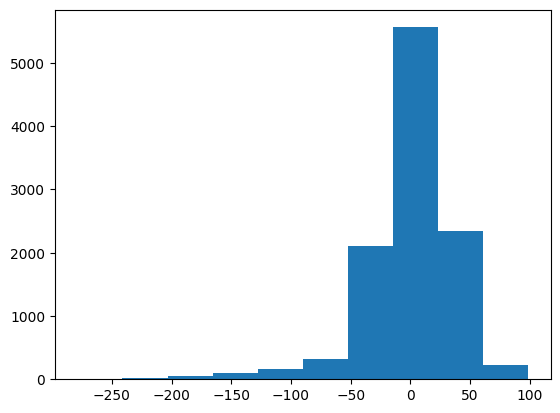

In [19]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

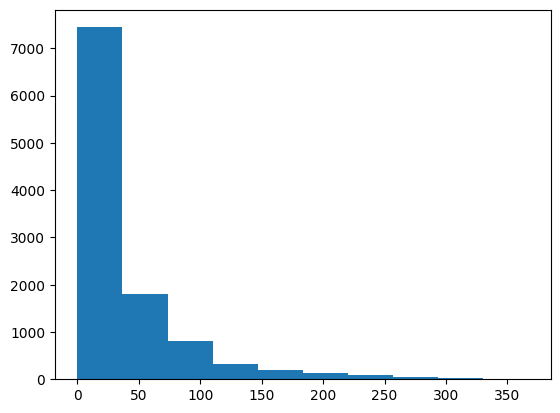

In [20]:
plt.hist(bikes['casual'])

In [21]:
bikes.describe()

season       holiday    workingday       weather         temp   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000  \
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered   
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  \
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

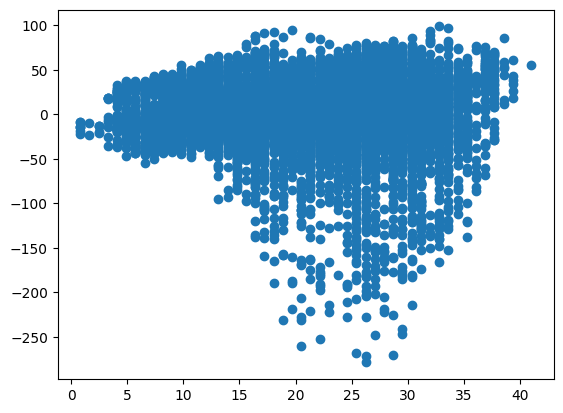

In [22]:
plt.scatter(bikes['temp'],res['error'])

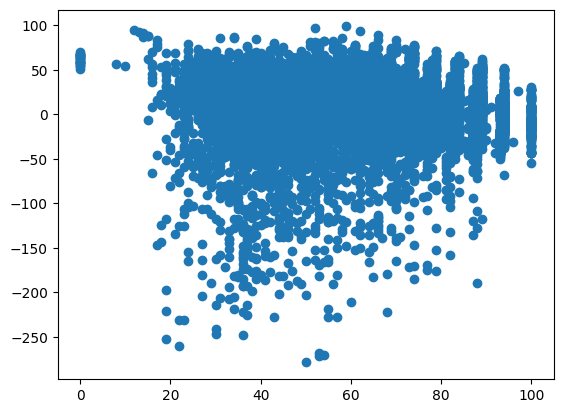

In [23]:
plt.scatter(bikes['humidity'],res['error'])

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-278.91580946, -271.42522287, -270.06496056, ...,   94.67880447,
           97.00144858,   98.7472395 ])),
 (35.25481020993883, 7.537924582888693e-14, 0.9365456663477384))

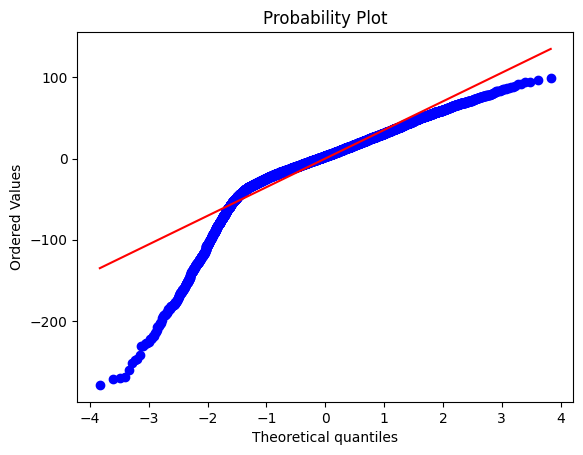

In [24]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [25]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_temp  dfb_humidity  dfb_workingday       cooks_d   
0          -0.002088  0.003502     -0.002551        0.004024  1.135234e-05  \
1          -0.000981  0.001573     -0.000984        0.001658  1.996754e-06   
2          -0.001620  0.002597     -0.001623        0.002736  5.438450e-06   
3          -0.003977  0.005157     -0.002407        0.005842  2.186977e-05   
4          -0.004714  0.006113     -0.002853        0.006924  3.072312e-05   
...              ...       ...           ...             ...           ...   
10881      -0.002906  0.002324      0.002299       -0.002460  7.083872e-06   
10882      -0.000409  0.000491      0.000195       -0.000466  2.282366e-07   
10883      -0.000384  0.000606      0.000067       -0.000516  2.865256e-07   
10884       0.000690 -0.001090     -0.000121        0.000928  9.277390e-07   
10885       0.000378 -0.000874      0.000153        0.000677  5.320960e-07   

       standard_resid  hat_diag  dffits_internal  student_resid

In [26]:
infl.summary_frame()

dfb_Intercept  dfb_temp  dfb_humidity  dfb_workingday       cooks_d   
0          -0.002088  0.003502     -0.002551        0.004024  1.135234e-05  \
1          -0.000981  0.001573     -0.000984        0.001658  1.996754e-06   
2          -0.001620  0.002597     -0.001623        0.002736  5.438450e-06   
3          -0.003977  0.005157     -0.002407        0.005842  2.186977e-05   
4          -0.004714  0.006113     -0.002853        0.006924  3.072312e-05   
...              ...       ...           ...             ...           ...   
10881      -0.002906  0.002324      0.002299       -0.002460  7.083872e-06   
10882      -0.000409  0.000491      0.000195       -0.000466  2.282366e-07   
10883      -0.000384  0.000606      0.000067       -0.000516  2.865256e-07   
10884       0.000690 -0.001090     -0.000121        0.000928  9.277390e-07   
10885       0.000378 -0.000874      0.000153        0.000677  5.320960e-07   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0           -0.296994  0.000515        -0.006739      -0.296982 -0.006738  
1           -0.122593  0.000531        -0.002826      -0.122588 -0.002826  
2           -0.202321  0.000531        -0.004664      -0.202312 -0.004664  
3           -0.430365  0.000472        -0.009353      -0.430348 -0.009353  
4           -0.510090  0.000472        -0.011086      -0.510073 -0.011085  
...               ...       ...              ...            ...       ...  
10881       -0.368198  0.000209        -0.005323      -0.368183 -0.005323  
10882       -0.069153  0.000191        -0.000955      -0.069150 -0.000955  
10883       -0.075935  0.000199        -0.001071      -0.075931 -0.001071  
10884        0.136638  0.000199         0.001926       0.136632  0.001926  
10885        0.098941  0.000217         0.001459       0.098937  0.001459  

[10886 rows x 10 columns]

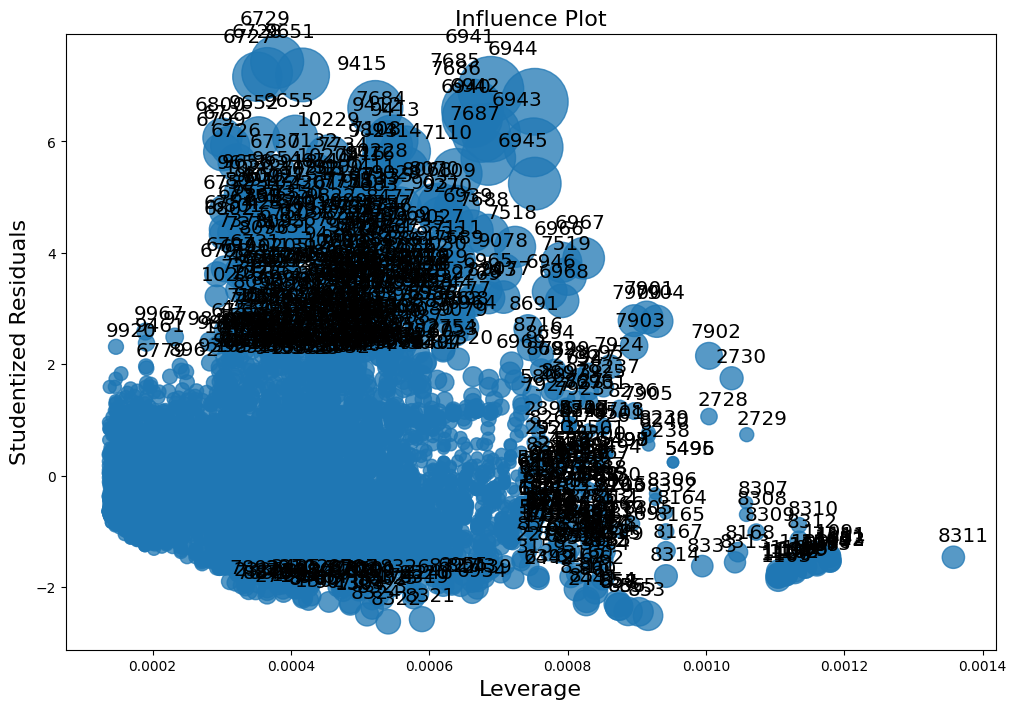

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [28]:
res

y_hat  casual      error    sq_error
0      14.175362       3  11.175362  124.888726
1      12.612922       8   4.612922   21.279053
2      12.612922       5   7.612922   57.956588
3      19.194189       3  16.194189  262.251766
4      19.194189       0  19.194189  368.416901
...          ...     ...        ...         ...
10881  20.856745       7  13.856745  192.009387
10882  12.602536      10   2.602536    6.773194
10883   6.857740       4   2.857740    8.166680
10884   6.857740      12  -5.142260   26.442834
10885   0.276474       4  -3.723526   13.864649

[10886 rows x 4 columns]

In [29]:
dummies_season = pd.get_dummies(bikes.season, dtype=int)

In [30]:
dummies_season.rename(columns = {1:'win', 2:'spr', 3:'sum', 4:'fall'}, inplace = True)

In [31]:
bikes = pd.concat([bikes,dummies_season], axis=1)

In [32]:
bikes

datetime  season  holiday  workingday  weather   temp   
0      2011-01-01 00:00:00       1        0           0        1   9.84  \
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  win  spr  sum   
0      14.395        81     0.0000       3          13     16    1    0    0  \
1      13.635        80     0.0000       8          32     40    1    0    0   
2      13.635        80     0.0000       5          27     32    1    0    0   
3      14.395        75     0.0000       3          10     13    1    0    0   
4      14.395        75     0.0000       0           1      1    1    0    0   
...       ...       ...        ...     ...         ...    ...  ...  ...  ...   
10881  19.695        50    26.0027       7         329    336    0    0    0   
10882  17.425        57    15.0013      10         231    241    0    0    0   
10883  15.910        61    15.0013       4         164    168    0    0    0   
10884  17.425        61     6.0032      12         117    129    0    0    0   
10885  16.665        66     8.9981       4          84     88    0    0    0   

       fall  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
10881     1  
10882     1  
10883     1  
10884     1  
10885     1  

[10886 rows x 16 columns]

In [33]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  win         10886 non-null  int64  
 13  spr         10886 non-null  int64  
 14  sum         10886 non-null  int64  
 15  fall        10886 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [34]:
# convert to datetime
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [35]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  win         10886 non-null  int64         
 13  spr         10886 non-null  int64         
 14  sum         10886 non-null  int64         
 15  fall        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [83]:
daily_dataset = bikes.set_index('datetime').resample("D").agg({'workingday':'max','humidity':'max','temp':'mean','casual':'sum','registered':'sum', 'weather':'sum', 'season':'sum'})

In [84]:
daily_dataset

workingday  humidity       temp  casual  registered  weather   
datetime                                                                   
2011-01-01         0.0      94.0  14.110833     331         654       38  \
2011-01-02         0.0     100.0  14.902609     131         670       45   
2011-01-03         1.0      69.0   8.050909     120        1229       22   
2011-01-04         1.0      74.0   8.200000     108        1454       24   
2011-01-05         1.0      74.0   9.305217      82        1518       23   
...                ...       ...        ...     ...         ...      ...   
2012-12-15         0.0      87.0  13.290833     767        4280       33   
2012-12-16         0.0      93.0  14.862500     538        3248       49   
2012-12-17         1.0     100.0  16.126667     212        4373       51   
2012-12-18         1.0      94.0  16.844167     433        5124       29   
2012-12-19         1.0      87.0  13.632500     333        4934       24   

            season  
datetime            
2011-01-01      24  
2011-01-02      23  
2011-01-03      22  
2011-01-04      23  
2011-01-05      23  
...            ...  
2012-12-15      96  
2012-12-16      96  
2012-12-17      96  
2012-12-18      96  
2012-12-19      96  

[719 rows x 7 columns]

In [82]:
results = ols("casual ~ temp + humidity + workingday", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     260.2
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           4.66e-98
Time:                        20:53:02   Log-Likelihood:                -3404.4
No. Observations:                 456   AIC:                             6817.
Df Residuals:                     452   BIC:                             6833.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    834.0473    128.157      6.508      0.0

In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [35]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [39]:
bikes.head(2)

datetime  season  holiday  workingday  weather  temp   atemp   
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  win  spr  sum  fall  
0        81        0.0       3          13     16    1    0    0     0  
1        80        0.0       8          32     40    1    0    0     0

In [40]:
# separate features and target
categorical_features = ['workingday','season', 'weather']
numerical_features = ['temp','humidity', 'windspeed']
target = 'casual'

In [41]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(bikes[categorical_features + numerical_features]
                                                    ,bikes[target],
                                                    test_size = 0.3, random_state=1234)

In [42]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [43]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [44]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [45]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [46]:
pred = linear_regression.predict(X_test)

In [47]:
pred

array([  3.984375,  54.359375,  28.109375, ..., -11.4375  ,   8.859375,
        10.078125])

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
np.sqrt(mean_squared_error(pred,y_test))

37.03423347821066

In [50]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [52]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge(alpha=3.0))])

In [53]:
pred_ridge = ridge_regression.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

37.04428469172452

In [55]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [56]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [57]:
lasso_pred = lasso_regression.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

37.32788927335004

In [59]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [61]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workingday', 'season',
                                                   'weather']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [62]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

38.376526508419815

In [64]:
dummies_weather = pd.get_dummies(bikes.weather, dtype=int)
dummies_weather.rename(columns = {1:'hot', 2:'warm', 3:'rainy', 4:'cold'}, inplace = True)
bikes=pd.concat([bikes,dummies_weather],axis=1)

In [65]:
bikes

datetime  season  holiday  workingday  weather   temp   
0     2011-01-01 00:00:00       1        0           0        1   9.84  \
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  win  spr  sum   
0      14.395        81     0.0000       3          13     16    1    0    0  \
1      13.635        80     0.0000       8          32     40    1    0    0   
2      13.635        80     0.0000       5          27     32    1    0    0   
3      14.395        75     0.0000       3          10     13    1    0    0   
4      14.395        75     0.0000       0           1      1    1    0    0   
...       ...       ...        ...     ...         ...    ...  ...  ...  ...   
10881  19.695        50    26.0027       7         329    336    0    0    0   
10882  17.425        57    15.0013      10         231    241    0    0    0   
10883  15.910        61    15.0013       4         164    168    0    0    0   
10884  17.425        61     6.0032      12         117    129    0    0    0   
10885  16.665        66     8.9981       4          84     88    0    0    0   

       fall  hot  warm  rainy  cold  
0         0    1     0      0     0  
1         0    1     0      0     0  
2         0    1     0      0     0  
3         0    1     0      0     0  
4         0    1     0      0     0  
...     ...  ...   ...    ...   ...  
10881     1    1     0      0     0  
10882     1    1     0      0     0  
10883     1    1     0      0     0  
10884     1    1     0      0     0  
10885     1    1     0      0     0  

[10886 rows x 20 columns]

In [86]:
results = ols("casual ~ temp + humidity + workingday + weather + season", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          5.24e-104
Time:                        20:59:12   Log-Likelihood:                -3384.8
No. Observations:                 456   AIC:                             6782.
Df Residuals:                     450   BIC:                             6806.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    950.3689    125.691      7.561      0.0

In [87]:
"y_hat = 49.1908 + 2.8550temp - 0.9038humidity - 36.1459workingday + 3.2325weather + 2.0067season"

'y_hat = 49.1908 + 2.8550temp - 0.9038humidity - 36.1459workingday + 3.2325weather + 2.0067season'

In [88]:
bikes.head()

datetime  season  holiday  workingday  weather  temp   atemp   
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395  \
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  win  spr  sum  fall  hot   
0        81        0.0       3          13     16    1    0    0     0    1  \
1        80        0.0       8          32     40    1    0    0     0    1   
2        80        0.0       5          27     32    1    0    0     0    1   
3        75        0.0       3          10     13    1    0    0     0    1   
4        75        0.0       0           1      1    1    0    0     0    1   

   warm  rainy  cold  
0     0      0     0  
1     0      0     0  
2     0      0     0  
3     0      0     0  
4     0      0     0

In [89]:
49.1908 + (2.8550*9.84) - (0.9038*81) - (36.1459*0) + (3.2325*1) + (2.0067*1)

9.3154

In [92]:
pred_vals = results.predict(bikes[['temp','humidity','workingday','weather','season']])

In [93]:
pred_vals

0        1282.992640
1        1242.180947
2        1242.180947
3        1295.563298
4        1295.563298
            ...     
10881     817.198806
10882     759.626235
10883     708.338994
10884     708.338994
10885     654.956643
Length: 10886, dtype: float64

In [72]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['casual']], axis=1)

In [73]:
res

y_hat  casual
0       9.316515       3
1       7.879203       8
2       7.879203       5
3      14.739230       3
4      14.739230       0
...          ...     ...
10881  23.595678       7
10882  14.928079      10
10883   8.971837       4
10884   8.971837      12
10885   2.111810       4

[10886 rows x 2 columns]

In [74]:
res['error'] = res['y_hat'] - res['casual']

In [75]:
res['sq_error'] = res['error']**2

In [76]:
np.sqrt(res['sq_error'].mean())

37.53245558948964

(array([   7.,   18.,   46.,   83.,  151.,  311., 1892., 5635., 2493.,
         250.]),
 array([-282.84415485, -244.78334823, -206.72254161, -168.66173499,
        -130.60092837,  -92.54012175,  -54.47931513,  -16.41850851,
          21.64229811,   59.70310473,   97.76391135]),
 <BarContainer object of 10 artists>)

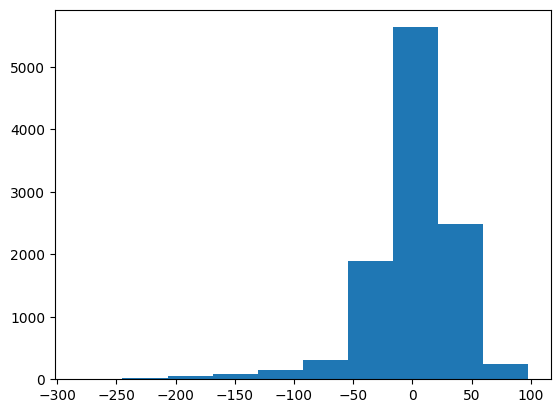

In [77]:
plt.hist(res['error'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

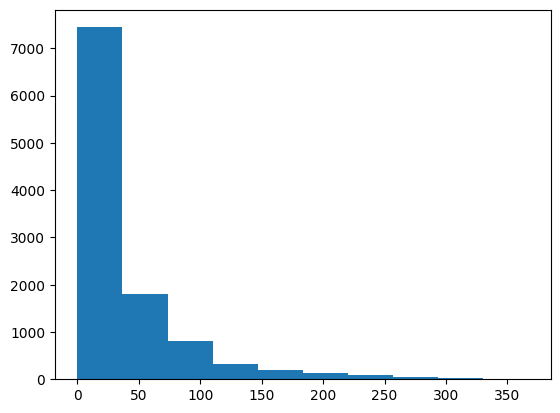

In [78]:
plt.hist(bikes['casual'])